<img src='https://weclouddata.com/wp-content/uploads/2016/11/logo.png' width='30%'>
-------------

<h3 align='center'> Machine Learning Hands-on Workshop </h2>
<h1 align='center'> Home Credit Default Risk Kaggle Competition </h1>

<br>
<center align="left"> <h4>Presentened by:</h4> </center>
<center align="left"> <h4>Vanessa Feng, WeCloudData Academy</h4> </center>

----------

[Home Credit Default Risk Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk) Can you predict how capable each applicant is of repaying a loan?

# Content:
- [Problem analysis](#Problem-analysis)
- [Methodologies](#Methodologies)
    - [Building blocks of a Machine Learning algorithm](#Building-blocks-of-a-Machine-Learning-algorithm)
    - [Attempt 1](#Attempt-1)
        - [Data preparation](#Data-preparation)
        - [Model training](#Model-training)
        - [Model evaluation](#Model-evaluation)
        - [Cross validation](#Cross-validation)
        - [Model tuning](#Model-tuning)
        - [Test data prediction](#Test-data-prediction)
    - [Attempt 2](#Attempt-2)
        - [Data preparation: multiple datasets](#Data-preparation:-multiple-datasets)
- [Model deployment](#Model-deployment)

# Problem analysis
### Understand the problem
Read the competition overview at https://www.kaggle.com/c/home-credit-default-risk#description.
We are trying to predict whether each credit applicant is going to have payment difficulty or not.

### Understand the data
Read the dataset description at https://www.kaggle.com/c/home-credit-default-risk/data.

In [1]:
# get a peak into the data files using shell command
# only works for linux-based systems
!head -n 10 data/application_train.csv

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [1]:
# get a peek into the data files using pandas
import pandas as pd
filename = 'D:/workshop/data/application_train.csv'
df = pd.read_csv(filename)
df.head(20) # print out the first 20 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.dtypes) # check the data type of each column


SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [3]:
# understand the target distribution (raw count)
df[['SK_ID_CURR', 'TARGET']].groupby('TARGET').count()
#whether this data is balanced.

,SK_ID_CURR
TARGET,
0,282686
1,24825


In [8]:
# understand the target distribution (ratio)
df[['SK_ID_CURR', 'TARGET']].groupby('TARGET').count()/df.shape[0]

,SK_ID_CURR
TARGET,
0,0.919271
1,0.080729


#### Data files relationship
<img src='dataset.png' width='100%'>

<hr></hr>

# Methdologies

## Building blocks of a Machine Learning algorithm
<img src='training.png' width='80%'>

<hr></hr>
    
### Phase 2: validation time

<img src='validation.png' width='80%'>

## Attempt 1
Use one single dataset, basic feature extraction, and a single model to begin with.

### Data preparation

In [6]:
# Use `application_{train|test}.csv` only
# Take a look at the data fields in this file
filename = 'D:/workshop/data/HomeCredit_columns_description.csv'
desc_df = pd.read_csv(filename, encoding = "ISO-8859-1")
desc_df[desc_df['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [10]:
filename = 'D:/workshop/data/HomeCredit_columns_description.csv'
desc_df = pd.read_csv(filename, encoding = "ISO-8859-1")


In [11]:
# the target distribution of the entire dataset
def get_target_dist(df):
    rows = df.shape[0]
    target_dist_df = df[['SK_ID_CURR', 'TARGET']].groupby('TARGET').count()
    target_dist_df['PERCENT'] = target_dist_df['SK_ID_CURR']*100/rows
    return target_dist_df

In [14]:
# let's check the target distribution across the entire dataset
filename = 'D:/workshop/data/application_train.csv'
train_df = pd.read_csv(filename)
rows = train_df.shape[0] # total number of rows in the data
print(f'total rows: {rows}')
print(get_target_dist(train_df))

total rows: 307511
        SK_ID_CURR    PERCENT
TARGET                       
0           282686  91.927118
1            24825   8.072882


In [16]:
# let's just use a subset of this dataset by reading the first 10000 rows
train_df = pd.read_csv(filename, nrows=10000)
rows = train_df.shape[0] # total number of rows in the data
print(f'total rows: {rows}')

total rows: 10000


In [18]:
# double check the target distribution
print(get_target_dist(train_df))
#to keep the distribution same

        SK_ID_CURR  PERCENT
TARGET                     
0              930     93.0
1               70      7.0


In [22]:
#better approach: randomly sample the entire dataset, not just take the first n rows
#filename='data/application_train.csv
filename = 'D:/workshop/data/application_train.csv'
train_df=pd.read_csv(filename)
train_df=train_df.sample(n=10000)
rows=train_df.shape[0]#total number of rows in the data
print(f'total rows:{rows}')

total rows:10000


In [23]:
print(get_target_dist(train_df))

        SK_ID_CURR  PERCENT
TARGET                     
0             9216    92.16
1              784     7.84


In [26]:
nan_cols=train_df.columns[train_df.isnull().any()] #find out columns with any null values
nan_cnt=train_df[nan_cols].isnull().sum()
print(nan_cnt)


AMT_GOODS_PRICE                   11
NAME_TYPE_SUITE                   49
OWN_CAR_AGE                     6624
OCCUPATION_TYPE                 3124
EXT_SOURCE_1                    5631
EXT_SOURCE_2                      27
EXT_SOURCE_3                    1952
APARTMENTS_AVG                  5061
BASEMENTAREA_AVG                5808
YEARS_BEGINEXPLUATATION_AVG     4875
YEARS_BUILD_AVG                 6664
COMMONAREA_AVG                  7010
ELEVATORS_AVG                   5306
ENTRANCES_AVG                   5004
FLOORSMAX_AVG                   4957
FLOORSMIN_AVG                   6810
LANDAREA_AVG                    5898
LIVINGAPARTMENTS_AVG            6857
LIVINGAREA_AVG                  5022
NONLIVINGAPARTMENTS_AVG         6969
NONLIVINGAREA_AVG               5479
APARTMENTS_MODE                 5061
BASEMENTAREA_MODE               5808
YEARS_BEGINEXPLUATATION_MODE    4875
YEARS_BUILD_MODE                6664
COMMONAREA_MODE                 7010
ELEVATORS_MODE                  5306
E

In [27]:
import numpy as np

y = [] # collect targets
data = [] # data (all columns except the target)

target_col = 'TARGET'
features = list([x for x in train_df.columns if x != target_col])

for row in train_df.to_dict('records'):
    y.append(row[target_col])
    data.append({k: row[k] for k in features})
    
y = np.array(y)

In [31]:
print(len(data),y.shape)

10000 (10000,)


In [32]:
# training-validation split
from sklearn.cross_validation import train_test_split

data_train, data_val, y_train, y_val = train_test_split(data, y, train_size=0.8, stratify=y)
# straify means after splitation the dataset, they still have the same dsitrbution
print(f'data_train cnt: {len(data_train)}')
print(f'data_val cnt: {len(data_val)}')

data_train cnt: 8000
data_val cnt: 2000


C:\Users\lenovo\Anaconda35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
from collections import defaultdict

def get_y_dist(y):
    target2cnt = defaultdict(int)
    for yi in y:
        target2cnt[yi] += 1
    
    print('target\tcnt\tratio')
    for target in sorted(target2cnt):
        cnt = target2cnt[target]
        print(f'{target}\t{cnt}\t{cnt/len(y)}')

In [36]:
from collections import defaultdict
def get_y_dist(y):
    target2cnt=defaultdict(int)
    for yi in y:
        target2cnt[yi]+=1
    print ('target\tcnt\tration')
    for target in sorted(target2cnt):
        cnt=target2cnt[target]
        print(f'{target}\t{cnt}\t{cnt/len(y)}]')

In [37]:
print('target distribution in training data')
get_y_dist(y_train)

print('\ntarget distribution in validation data')
get_y_dist(y_val)

target distribution in training data
target	cnt	ration
0	7373	0.921625]
1	627	0.078375]

target distribution in validation data
target	cnt	ration
0	1843	0.9215]
1	157	0.0785]


In [41]:
from sklearn.feature_extraction import DictVectorizer

# transform list of dictionary into numpy/scipy matrix
# DictVectorizer will collect how many categorical features
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(data_train)
print(f'after vectorization: {X_train.shape}')

after vectorization: (8000, 243)


In [42]:
from sklearn.feature_extraction import DictVectorizer
# 特征提取与 特征选择(Feature selection) 特征选择有很大的不同: 模型意义在于把复杂的数据，如文本和图像，
#     转化为数字特征，从而在机器学习中使用。后者是一个机器学习中应用这些特征的方法
#transform list of dictionary into numpy/scipy matrix
#example of DicVectorizer: 可以把特征向量转化成标准的Python字典对象的一个列表，
#范畴特征是一个键值对，其值被约束为离散的无序列表 
# >>> measurements = [
# ...     {'city': 'Dubai', 'temperature': 33.},
# ...     {'city': 'London', 'temperature': 12.},
# ...     {'city': 'San Fransisco', 'temperature': 18.},
# ... ]

# >>> from sklearn.feature_extraction import DictVectorizer
# >>> vec = DictVectorizer()

# >>> vec.fit_transform(measurements).toarray()
# array([[  1.,   0.,   0.,  33.],
#        [  0.,   1.,   0.,  12.],
#        [  0.,   0.,   1.,  18.]])

# >>> vec.get_feature_names()
# ['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']

In [43]:

vectorizer=DictVectorizer()
X_train=vectorizer.fit_transform(data_train)
print(f'after vectorization:{X_train}')
vectorizer

after vectorization:  (0, 0)	56263.5
  (0, 1)	497520.0
  (0, 2)	450000.0
  (0, 3)	315000.0
  (0, 4)	nan
  (0, 5)	nan
  (0, 6)	nan
  (0, 7)	nan
  (0, 8)	nan
  (0, 9)	nan
  (0, 10)	0.066
  (0, 11)	0.0666
  (0, 12)	0.0672
  (0, 13)	nan
  (0, 14)	nan
  (0, 15)	nan
  (0, 16)	1.0
  (0, 17)	3.0
  (0, 18)	1.0
  (0, 20)	nan
  (0, 21)	nan
  (0, 22)	nan
  (0, 23)	-16682.0
  (0, 24)	-3193.0
  (0, 25)	-207.0
  :	:
  (7999, 112)	1.0
  (7999, 120)	1.0
  (7999, 128)	1.0
  (7999, 129)	nan
  (7999, 130)	nan
  (7999, 131)	nan
  (7999, 132)	nan
  (7999, 133)	nan
  (7999, 134)	nan
  (7999, 147)	1.0
  (7999, 161)	1.0
  (7999, 212)	6.0
  (7999, 213)	0.02461
  (7999, 214)	2.0
  (7999, 215)	2.0
  (7999, 220)	284146.0
  (7999, 221)	nan
  (7999, 222)	nan
  (7999, 236)	1.0
  (7999, 237)	nan
  (7999, 238)	nan
  (7999, 239)	nan
  (7999, 240)	nan
  (7999, 241)	nan
  (7999, 242)	nan


DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [47]:
#inspect feature names
for i,feature in enumerate(vectorizer.feature_names_):
    print(f'{i}\t{feature}')
#     enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，
#     同时列出数据和数据下标，一般用在 for 循环当中。
# >>>seasons = ['Spring', 'Summer', 'Fall', 'Winter']
# >>> list(enumerate(seasons))
# [(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]


0	AMT_ANNUITY
1	AMT_CREDIT
2	AMT_GOODS_PRICE
3	AMT_INCOME_TOTAL
4	AMT_REQ_CREDIT_BUREAU_DAY
5	AMT_REQ_CREDIT_BUREAU_HOUR
6	AMT_REQ_CREDIT_BUREAU_MON
7	AMT_REQ_CREDIT_BUREAU_QRT
8	AMT_REQ_CREDIT_BUREAU_WEEK
9	AMT_REQ_CREDIT_BUREAU_YEAR
10	APARTMENTS_AVG
11	APARTMENTS_MEDI
12	APARTMENTS_MODE
13	BASEMENTAREA_AVG
14	BASEMENTAREA_MEDI
15	BASEMENTAREA_MODE
16	CNT_CHILDREN
17	CNT_FAM_MEMBERS
18	CODE_GENDER=F
19	CODE_GENDER=M
20	COMMONAREA_AVG
21	COMMONAREA_MEDI
22	COMMONAREA_MODE
23	DAYS_BIRTH
24	DAYS_EMPLOYED
25	DAYS_ID_PUBLISH
26	DAYS_LAST_PHONE_CHANGE
27	DAYS_REGISTRATION
28	DEF_30_CNT_SOCIAL_CIRCLE
29	DEF_60_CNT_SOCIAL_CIRCLE
30	ELEVATORS_AVG
31	ELEVATORS_MEDI
32	ELEVATORS_MODE
33	EMERGENCYSTATE_MODE
34	EMERGENCYSTATE_MODE=No
35	EMERGENCYSTATE_MODE=Yes
36	ENTRANCES_AVG
37	ENTRANCES_MEDI
38	ENTRANCES_MODE
39	EXT_SOURCE_1
40	EXT_SOURCE_2
41	EXT_SOURCE_3
42	FLAG_CONT_MOBILE
43	FLAG_DOCUMENT_10
44	FLAG_DOCUMENT_11
45	FLAG_DOCUMENT_12
46	FLAG_DOCUMENT_13
47	FLAG_DOCUMENT_14
48	FLAG_DOCUMENT_15

In [54]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MaxAbsScaler


In [57]:
# for each feature,fill in NA values with the mean value across all samples
imputer=Imputer(strategy='mean')
X_train=imputer.fit_transform(X_train)



In [59]:
#scaling data by column so different features have roughly the same magnitude
scaler=MaxAbsScaler()
X_train=scaler.fit_transform(X_train.toarray())#for training data,youwill use fit
print(f'X_train data type:{type(X_train)}')
print(f'X_train:{X_train.shape}')

X_train data type:<class 'numpy.ndarray'>
X_train:(8000, 243)


In [62]:
# IMPORTANT: use the same set of preprocessors (vectorizer, imputer, and scaler) to transform the validation/test data
X_val=vectorizer.transform(data_val)#transfer into data,np.array
X_val=imputer.transform(X_val)#missing value
X_val=scaler.transform(X_val)#scale dataset
print(f'X_vak data type:{type(X_val)}')
print(f'X_val:{X_val.shape}')




X_vak data type:<class 'scipy.sparse.csc.csc_matrix'>
X_val:(2000, 243)


### Model training

In [63]:
from sklearn.linear_model import LogisticRegression
import time

# fit model
model = LogisticRegression(class_weight='balanced')
# balanced means make sure the regression will pay enoough attention to the minor classes. or else, the model will just 
# focus on optimization 

start = time.time()
print(f'Fitting model on {X_train.shape[0]} samples...')
model.fit(X_train, y_train)

end = time.time()
print('Finished model training in %.3f seconds.' % (end-start))

Fitting model on 8000 samples...
Finished model training in 1.264 seconds.


In [28]:
from sklearn.linear_model import LogisticRegression
import time

def get_sample_weights(y):
    weights = []
    for yi in y:
        weights.append(10 if yi else 1)
    return np.array(weights)

# fit model
model = LogisticRegression()

start = time.time()
print(f'Fitting model on {X_train.shape[0]} samples...')
model.fit(X_train, y_train, sample_weight=get_sample_weights(y_train))

end = time.time()
print('Finished model training in %.3f seconds.' % (end-start))

Fitting model on 8000 samples...
Finished model training in 1.160 seconds.


### Model evaluation

The competition uses the area under ROC curve for evaluation, see https://www.kaggle.com/c/home-credit-default-risk#evaluation.

<img src='validation.png' width='100%'>

In [71]:
# perform your trained model on test data to get predictions
y_preds = model.predict(X_val)

In [ ]:
for i,y_pred in enumerate(y_preds):
    y_true=y_val[i]
    print(f'i\ty_pred:{y_pred},y_true:{y_true}')

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_preds, labels=[0, 1], target_names=['NO', 'YES']))

             precision    recall  f1-score   support

         NO       0.95      0.69      0.80      1843
        YES       0.14      0.60      0.23       157

avg / total       0.89      0.69      0.76      2000



In [76]:
def evaluate(X_val, y_val):
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    pos_idx = list(model.classes_).index(1)
    # compute area under ROC
    # we need probabilities to do this
    y_score = model.predict_proba(X_val)[:,pos_idx]
    fpr, tpr, _ = roc_curve(y_val, y_score, pos_label=1)
    roc_auc = roc_auc_score(y_val, y_score)
#     print(f'auc: {auc}')
    
    return roc_auc, fpr, tpr

In [78]:
print(X_val.shape)
print(y_val.shape)
roc_auc, fpr, tpr = evaluate(X_val, y_val)

(2000, 243)
(2000,)


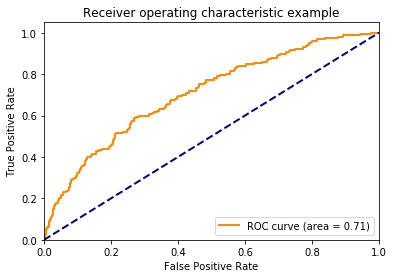

In [80]:
import matplotlib.pyplot as plt
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

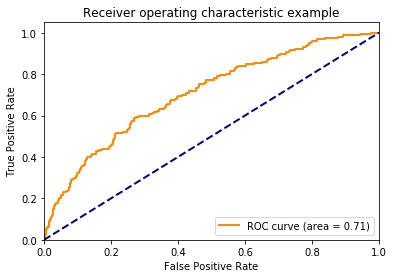

In [81]:
import matplotlib.pyplot as plt
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

import matplotlib.pyplot as plt
lw=2
plt.plot(fpr,tpr,color='darkorange',
        lw=lw,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# ROC曲线越接近左上角，该分类器的性能越好。
# AUC值越大越好。
# 在实际的数据集中经常会出现类不平衡（class imbalance）现象，
# 即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间变化。
# 可以明显的看出，ROC曲线基本保持原貌，而Precision-Recall曲线则变化较大。

In [ ]:
# http://alexkong.net/2013/06/introduction-to-auc-and-roc/
#describe the ROC,AUC,precision and recall

### Cross validation

To get a more reliable performance evaluation of your model, you need to repeat the above random train-test split multiple times and average the performance across different splits. This is called **cross-validation**.

The convention is to perform 5-fold or 10-fold cross-validation.

<hr></hr>

**Do we need more samples?**

Previously, we just sampled 10000 samples from the entire `application_train.csv` dataset, and there's a chance we didn't have enough data to train the model.

Offline practice: See how more training data will affect the overall performance.

<hr></hr>

### Model tuning

- **Hyper-parameter tuning**: pick a model and try different model hyper-parameters and pick the set of parameters with the best validation score
  
  **Example**: http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py
  
- Try different models

<hr></hr>

## Attempt2

What if we use some of the other information provided?

### Data preparation: multiple datasets

In [83]:
prev_app_filename = 'D:/workshop/data/previous_application.csv'
# it contains applicant's history information
prev_app_df = pd.read_csv(prev_app_filename)
prev_app_df.head(20) # print out the first 20 rows

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
filename = 'D:/workshop/data/HomeCredit_columns_description.csv'
desc_df = pd.read_csv(filename, encoding = "ISO-8859-1")
desc_df[desc_df['Table'] == 'previous_application.csv']

,Unnamed: 0,Table,Row,Description,Special
173,176,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
177,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
178,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
179,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
181,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN
182,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


In [86]:
# since it is a 1-N mapping between `SK_ID_CURR` and `SK_ID_PREV`, 
# we need to find a way to encode those variable number of corresponding 
# previous applications for a given current application.

# one way to do this is by aggregating
prev_agg = prev_app_df.groupby('SK_ID_CURR')
prev_df = prev_agg.agg({'SK_ID_PREV': 'count', 'AMT_ANNUITY': 'sum'}).rename(columns={
    'SK_ID_PREV': 'PREV_APPS', 'AMT_ANNUITY': 'PREV_AMT_ANNUITY'})

In [39]:
prev_df.head(20)

,PREV_APPS,PREV_AMT_ANNUITY
SK_ID_CURR,,
100001,1,3951.000
100002,1,9251.775
100003,3,169661.970
100004,1,5357.250
100005,2,4813.200
100006,9,141907.050
100007,6,73672.830
100008,5,63358.785
100009,7,70359.885


In [40]:
# left join current application with aggregated previous application info
curr_prev_df = train_df.fillna(value=train_df.mean()).join(prev_df, on='SK_ID_CURR', how='left')
curr_prev_df[['PREV_APPS', 'PREV_AMT_ANNUITY']] = curr_prev_df[['PREV_APPS', 'PREV_AMT_ANNUITY']].fillna(value=0)
print(curr_prev_df.shape[0])
curr_prev_df

10000


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_APPS,PREV_AMT_ANNUITY
142403,265112,0,Cash loans,F,N,Y,1,225000.0,521280.0,19984.5,...,0,0,0.000000,0.000000,0.00000,3.000000,0.000000,1.000000,10.0,66959.010
176764,304837,0,Cash loans,F,N,Y,0,153000.0,1125000.0,32895.0,...,0,0,0.006122,0.006353,0.03477,0.254361,0.259097,1.928151,1.0,18229.320
136759,258617,0,Cash loans,F,N,Y,0,225000.0,938034.0,33363.0,...,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,4.0,98246.745
262549,403989,0,Cash loans,M,Y,Y,0,225000.0,1078200.0,31522.5,...,0,0,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,11.0,275362.920
124191,244020,1,Cash loans,M,N,Y,0,112500.0,243000.0,27544.5,...,0,0,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,9.0,48470.535
102477,218964,0,Cash loans,F,N,Y,0,166500.0,1449000.0,38353.5,...,0,0,0.000000,0.000000,0.00000,4.000000,0.000000,1.000000,4.0,119835.135
305851,454362,0,Cash loans,F,N,N,0,112500.0,247500.0,10480.5,...,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000
259269,400051,0,Cash loans,F,Y,N,2,180000.0,825673.5,37440.0,...,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,6.0,162902.745
189422,319627,0,Cash loans,F,N,Y,0,157500.0,1123443.0,32976.0,...,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,1.0,57382.425
162012,287818,0,Cash loans,F,N,Y,0,67500.0,781920.0,25969.5,...,0,0,0.006122,0.006353,0.03477,0.254361,0.259097,1.928151,4.0,49739.310


# Model deployment

In reality, we would want to build an API to do near-real-time prediction. However, for Kaggle, it's sufficient to just save your model, scaler, and vectorizer as binary files so you can load them again in later time to do prediction.

This is usually done by using Python's pickle module or Sklearn's wrapper around it.

More information: http://scikit-learn.org/stable/modules/model_persistence.html

In [41]:
import pickle
from sklearn.externals import joblib

# saving binary files
joblib.dump(model, 'model')
joblib.dump(scaler, 'scaler')
joblib.dump(vectorizer, 'vectorizer')


# loading binary files
model = joblib.load('model')
scaler = joblib.load('scaler')
vectorizer = joblib.load('vectorizer')